In [7]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为黑体，用于支持中文显示
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [8]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [9]:
# 设置样本数量和特征数量
num_samples = 100
num_features = 3

# 随机生成特征数据（X），服从正态分布
X = np.random.randn(num_samples, num_features)

# 随机生成真实的权重（模拟真实关系），并加上偏置项
true_weights = np.array([2, -1, 3])
bias = 5
# 根据线性关系生成目标值（y），加上一些噪声使其更真实
noise = np.random.randn(num_samples) * 0.5
y = np.dot(X, true_weights) + bias + noise

# 将数据转换为PyTorch张量
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

In [10]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)

In [11]:
# 实例化模型、定义损失函数和优化器
model = LinearRegressionModel(num_features)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# 用于记录每次迭代的损失值
losses = []
num_epochs = 100

for epoch in range(num_epochs):
    # 前向传播
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    # 反向传播并更新权重
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item()}')

Epoch 10/100, Loss: 28.234264373779297
Epoch 20/100, Loss: 19.306734085083008
Epoch 30/100, Loss: 13.26022720336914
Epoch 40/100, Loss: 9.154989242553711
Epoch 50/100, Loss: 6.361025810241699
Epoch 60/100, Loss: 4.454966068267822
Epoch 70/100, Loss: 3.1515963077545166
Epoch 80/100, Loss: 2.2583096027374268
Epoch 90/100, Loss: 1.6447136402130127
Epoch 100/100, Loss: 1.222324252128601


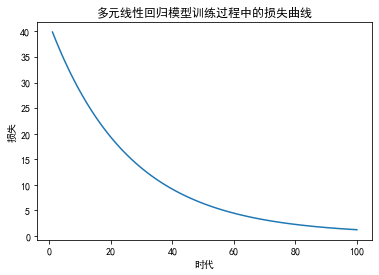

In [12]:
plt.plot(range(1, num_epochs + 1), losses)
plt.xlabel('时代')
plt.ylabel('损失')
plt.title('多元线性回归模型训练过程中的损失曲线')
plt.show()